### **CNN MODELLING**

**Drive Connection**


In [17]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Importing Required Libraries**



In [5]:
# importing libraries 
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

**Loading Train-Validation-Test Datasets**



In [6]:
X_train = np.load('/content/drive/MyDrive/Project/X_train.npy')
y_train = np.load('/content/drive/MyDrive/Project/y_train.npy')
X_val = np.load('/content/drive/MyDrive/Project/X_val.npy')
y_val = np.load('/content/drive/MyDrive/Project/y_val.npy')
X_test = np.load('/content/drive/MyDrive/Project/X_test.npy')
y_test = np.load('/content/drive/MyDrive/Project/y_test.npy')

**Creating a Model Object**



In [7]:
model = tf.keras.Sequential()


**Adding Convolution and Max Pooling Layers**



In [8]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu",
                                 input_shape=(32, 32, 1)))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

# Add more convolution and max pooling layers
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 padding="same",
                                 activation="relu"))

# Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

**Model Compiling**



In [9]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Training the Model**



In [10]:
# Train the model for 50 epochs with batch size of 128
results = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(X_val, y_val))

Epoch 1/50
48/48 [==============================] - 12s 226ms/step - loss: 2.1515 - accuracy: 0.1893 - val_loss: 1.8468 - val_accuracy: 0.3519
Epoch 2/50
48/48 [==============================] - 13s 264ms/step - loss: 1.8587 - accuracy: 0.3220 - val_loss: 1.5476 - val_accuracy: 0.4710
Epoch 3/50
48/48 [==============================] - 12s 247ms/step - loss: 1.6794 - accuracy: 0.4031 - val_loss: 1.3614 - val_accuracy: 0.5443
Epoch 4/50
48/48 [==============================] - 11s 222ms/step - loss: 1.5246 - accuracy: 0.4656 - val_loss: 1.2411 - val_accuracy: 0.6244
Epoch 5/50
48/48 [==============================] - 11s 222ms/step - loss: 1.4294 - accuracy: 0.4993 - val_loss: 1.1647 - val_accuracy: 0.6351
Epoch 6/50
48/48 [==============================] - 11s 224ms/step - loss: 1.3073 - accuracy: 0.5425 - val_loss: 1.0064 - val_accuracy: 0.6786
Epoch 7/50
48/48 [==============================] - 11s 227ms/step - loss: 1.2618 - accuracy: 0.5638 - val_loss: 0.9414 - val_accuracy: 0.7206

***Visualizing the Result***





**Loss vs Epoch Graph**



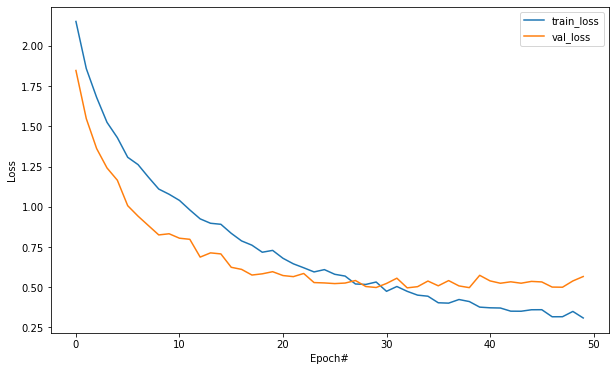

In [11]:
plt.figure(figsize=(10, 6))

# Plot the the training loss
plt.plot(results.history["loss"], label="train_loss")

# Plot the the validation loss
plt.plot(results.history["val_loss"], label="val_loss")


# Name the x and y axises
plt.ylabel("Loss") 
plt.xlabel("Epoch#")

# Put legend table
plt.legend()

# Show the plot
plt.show()

**Accuracy vs Epoch Graph**



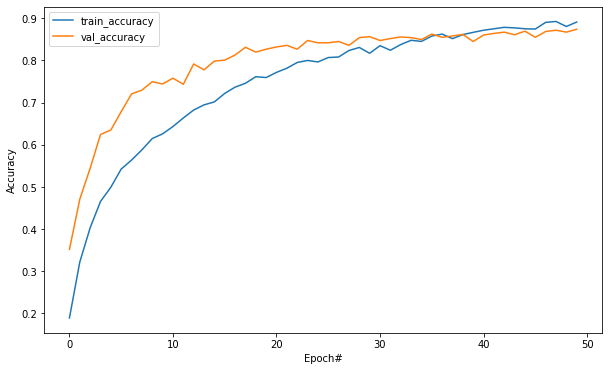

In [12]:
plt.figure(figsize=(10, 6))

# Plot the the training accuracy
plt.plot(results.history["accuracy"], label="train_accuracy")


# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label="val_accuracy")


# Name the x and y axises
plt.ylabel("Accuracy") 
plt.xlabel("Epoch#")

# Put legend table
plt.legend()

# Show the plot
plt.show()

**Performance Evaluating**



In [13]:
# Evaluate the performance
model.evaluate(X_test, y_test)

41/41 [==============================] - 1s 16ms/step - loss: 0.5854 - accuracy: 0.8481


[0.5853878855705261, 0.8480916023254395]

**Prediction for Reshaped Sample**



In [14]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[100].reshape(1, 32, 32, 1))

# Print the prediction result
prediction_result

array([[9.4104953e-06, 5.2066349e-05, 1.5204842e-02, 2.8201265e-04,
        2.9554528e-08, 1.6457083e-05, 5.0683763e-10, 2.5713147e-08,
        5.0800927e-03, 9.7935504e-01]], dtype=float32)

**Finding Predicted Class and Probabilty**



In [15]:
# Find the predicted class
predicted_class = prediction_result.argmax()

# Find the prediction probability
predicted_probability = prediction_result.max()

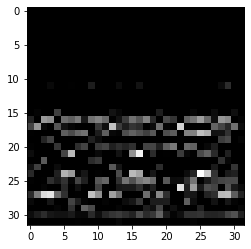

(32, 32)
This image belongs to class 9 with 0.9793550372123718 probability %
The actual class of the selected image is: [9]


In [16]:
plt.imshow(X_test[100], cmap="gray")
plt.show()

print(X_test[100].shape)

# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")
print(f"The actual class of the selected image is: {y_test[100]}")